In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

url="http://localhost:3030/iot"

ModuleNotFoundError: No module named 'pandas'

In [18]:
df = pd.read_json(url)

In [1]:
df

NameError: name 'df' is not defined

In [20]:
df.loc[:,'accel_x']+df.loc[:,'accel_y']+df.loc[:,'accel_z']

0        0.04
1        0.96
2       -0.16
3        1.56
4       -0.66
         ... 
12329   -1.09
12330   -1.09
12331   -1.09
12332   -1.09
12333   -1.09
Length: 12334, dtype: float64

In [21]:
df.insert(0, 'accel', round(np.sqrt(df.loc[:,'accel_x']**2+df.loc[:,'accel_y']**2+df.loc[:,'accel_z']**2), 2), allow_duplicates=False)
df.insert(0, 'gyro', round(np.sqrt(df.loc[:,'gyro_x']**2+df.loc[:,'gyro_y']**2+df.loc[:,'gyro_z']**2), 2), allow_duplicates=False)
df.insert(0, 'mag', round(np.sqrt(df.loc[:,'mag_x']**2+df.loc[:,'mag_y']**2+df.loc[:,'mag_z']**2), 2), allow_duplicates=False)
df = df[['date', 'accel_x', 'accel_y', 'accel_z', 'accel', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro', 'mag_x', 'mag_y', 'mag_z', 'mag']]

In [ ]:
df = df[['date', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']]

In [22]:
df.head()

,date,accel_x,accel_y,accel_z,accel,gyro_x,gyro_y,gyro_z,gyro,mag_x,mag_y,mag_z,mag
0,2021-12-11 18:29:42.649,-0.87,-0.29,1.20,1.51,-67.57,15.50,18.55,71.76,-29.87,62.65,-3.82,69.51
1,2021-12-11 18:29:43.653,-0.24,0.23,0.97,1.03,23.68,14.10,-88.07,92.28,-33.51,22.88,-17.96,44.37
2,2021-12-11 18:29:44.658,-0.66,-1.11,1.61,2.06,-147.89,-131.10,-55.54,205.29,1.75,18.95,-35.84,40.58
3,2021-12-11 18:29:45.664,0.43,0.63,0.50,0.91,-102.84,144.96,195.13,263.94,-7.03,49.23,-28.23,57.18
4,2021-12-11 18:29:46.668,-1.43,-0.25,1.02,1.77,383.48,-75.56,-440.06,588.57,-42.02,23.00,-4.31,48.10


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     12334 non-null  datetime64[ns]
 1   accel_x  12334 non-null  float64       
 2   accel_y  12334 non-null  float64       
 3   accel_z  12334 non-null  float64       
 4   accel    12334 non-null  float64       
 5   gyro_x   12334 non-null  float64       
 6   gyro_y   12334 non-null  float64       
 7   gyro_z   12334 non-null  float64       
 8   gyro     12334 non-null  float64       
 9   mag_x    12334 non-null  float64       
 10  mag_y    12334 non-null  float64       
 11  mag_z    12334 non-null  float64       
 12  mag      12334 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.2 MB


In [24]:
df.isnull().sum()

date       0
accel_x    0
accel_y    0
accel_z    0
accel      0
gyro_x     0
gyro_y     0
gyro_z     0
gyro       0
mag_x      0
mag_y      0
mag_z      0
mag        0
dtype: int64

In [25]:
df.describe()

,accel_x,accel_y,accel_z,accel,gyro_x,gyro_y,gyro_z,gyro,mag_x,mag_y,mag_z,mag
count,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000,12334.000000
mean,-0.072539,-0.020298,-0.231751,1.017379,-3.509919,1.824790,3.151330,49.390445,-27.771052,24.489942,13.823065,48.602949
std,0.321109,0.495824,0.815054,0.191013,81.475879,78.834924,100.737475,143.482627,14.640353,14.065702,26.076198,17.085257
min,-4.000000,-2.960000,-1.950000,0.080000,-1944.150000,-1298.160000,-1090.760000,0.220000,-105.550000,-24.160000,-41.700000,9.700000
25%,-0.080000,-0.320000,-0.920000,0.970000,1.830000,-0.670000,-0.180000,1.950000,-32.520000,14.010000,-12.500000,40.820000
50%,-0.060000,-0.020000,-0.690000,0.990000,1.950000,-0.550000,-0.120000,2.050000,-31.320000,21.610000,18.390000,48.335000
75%,0.000000,0.350000,0.800000,1.020000,2.010000,-0.430000,-0.060000,2.210000,-27.030000,33.555000,30.260000,56.100000
max,1.570000,3.570000,2.810000,5.380000,1914.370000,857.240000,938.290000,2215.740000,37.940000,66.520000,188.600000,215.160000


<AxesSubplot:title={'center':'Accelerometer Sensor'}, xlabel='date'>

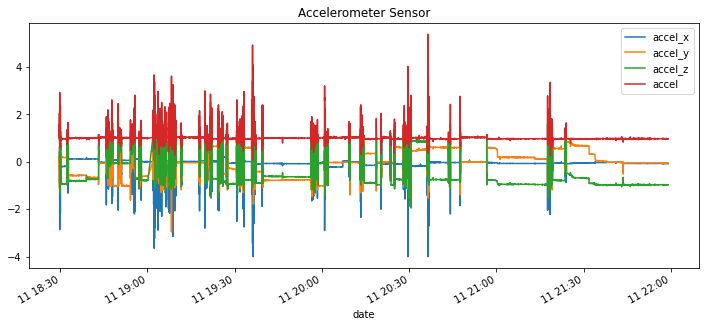

In [35]:
df.plot(x='date', y=['accel_x','accel_y','accel_z','accel'], figsize=(12,5), title="Accelerometer Sensor")

<AxesSubplot:title={'center':'Accelerometer Sensor'}, xlabel='date'>

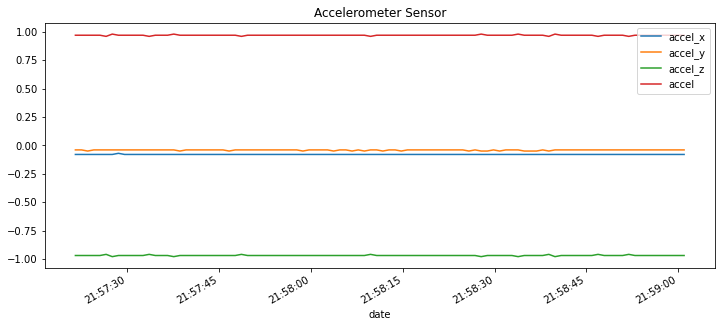

In [51]:
df.tail(100).plot(x='date', y=['accel_x','accel_y','accel_z','accel'], figsize=(12,5), title="Accelerometer Sensor")

<AxesSubplot:title={'center':'Gyro Sensor'}, xlabel='date'>

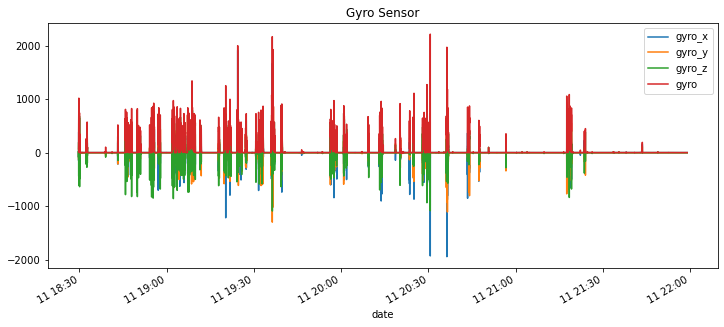

In [36]:
df.plot(x='date', y=['gyro_x','gyro_y','gyro_z','gyro'], figsize=(12,5), title="Gyro Sensor")

<AxesSubplot:title={'center':'Magnetic Sensor'}, xlabel='date'>

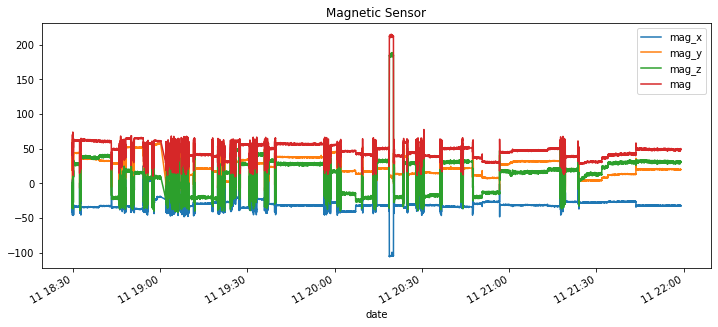

In [37]:
df.plot(x='date', y=['mag_x','mag_y','mag_z','mag'], figsize=(12,5), title="Magnetic Sensor")

<AxesSubplot:title={'center':'Sensors'}, xlabel='date'>

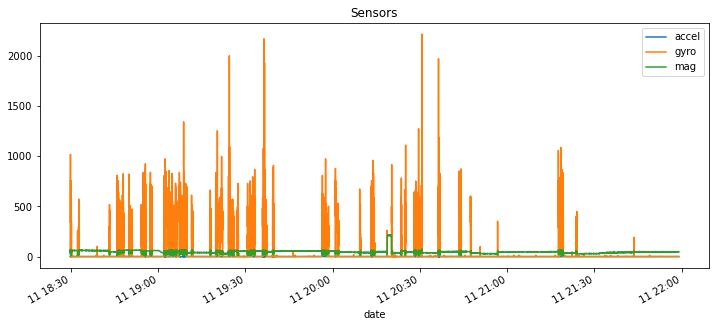

In [38]:
df.plot(x='date', y=['accel', 'gyro', 'mag'], figsize=(12,5), title="Sensors")

In [40]:
df2 = df.copy()
df2.insert(0,'','Accel')

<AxesSubplot:title={'center':'Mean of Accel, Gyro and Mag'}>

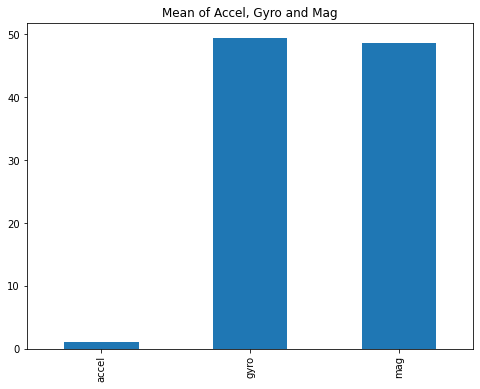

In [30]:
df[['accel', 'gyro', 'mag']].mean().plot.bar(figsize=(8,6), title='Mean of Accel, Gyro and Mag')

In [53]:
df_sq=df[['date','accel', 'gyro', 'mag']];df_sq.head()

,date,accel,gyro,mag
0,2021-12-11 18:29:42.649,1.51,71.76,69.51
1,2021-12-11 18:29:43.653,1.03,92.28,44.37
2,2021-12-11 18:29:44.658,2.06,205.29,40.58
3,2021-12-11 18:29:45.664,0.91,263.94,57.18
4,2021-12-11 18:29:46.668,1.77,588.57,48.10


In [54]:
df_sq.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

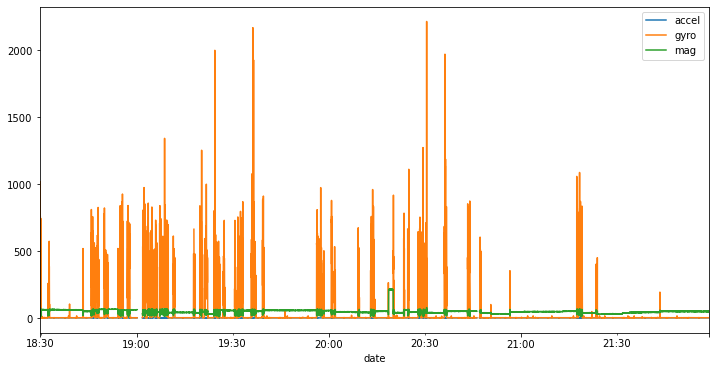

In [57]:
df_sq.resample('1S').mean().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

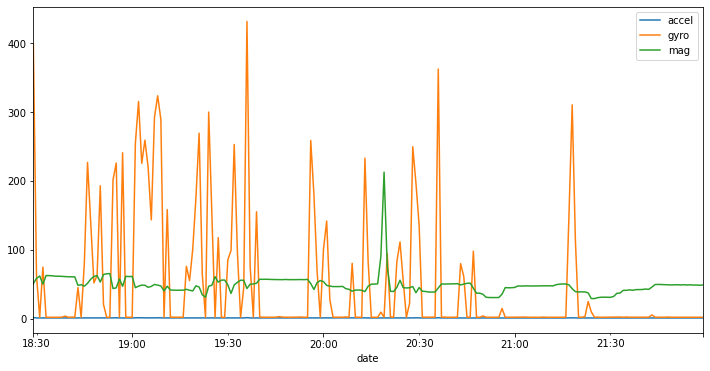

In [55]:
df_sq.resample('60S').mean().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

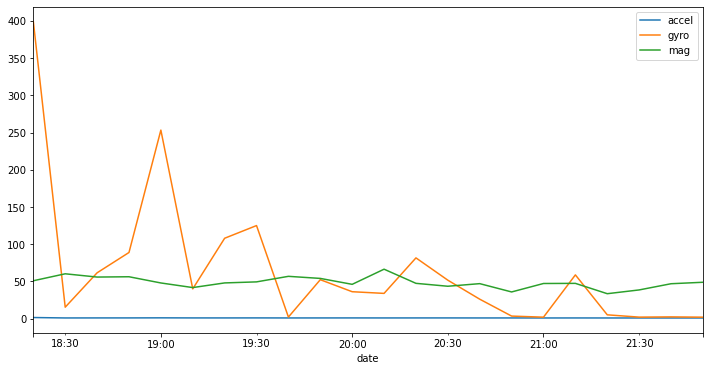

In [56]:
df_sq.resample('600S').mean().plot(figsize=(12,6))